In [2]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Distribution of Sample Means ##

In [2]:
united = Table.read_table('united.csv')
united.take(np.arange(3))

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3


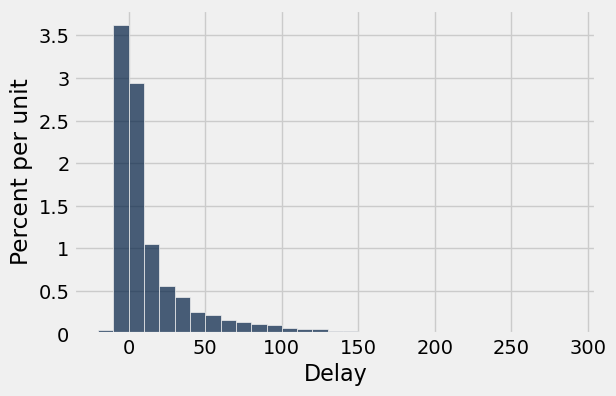

In [3]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [4]:
delays = united.column('Delay')
population_mean = np.mean(delays)
population_sd = np.std(delays)

population_mean, population_sd

(16.658155515370705, 39.480199851609314)

In [6]:
def one_sample_mean(sample_size):
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [7]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        means = np.append(means, one_sample_mean(sample_size))
    return means

In [8]:
"""Empirical distribution of random sample means"""

def plot_sample_means(sample_size):
    means = ten_thousand_sample_means(sample_size)
    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins = np.arange(0, 41, 0.5))
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Sample size:  25
Population mean: 16.6581555154
Average of sample means:  16.502084
Population SD: 39.4801998516
SD of sample means: 7.89065120614


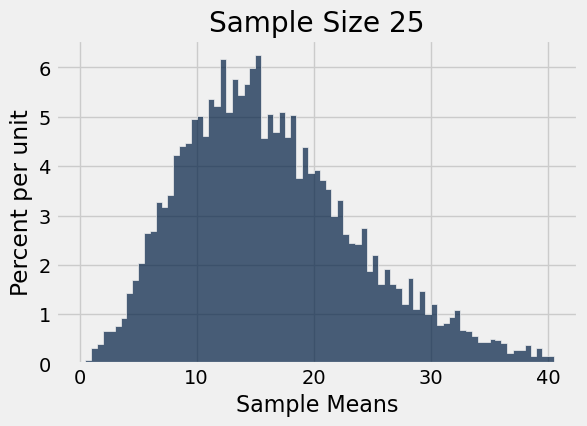

In [14]:
plot_sample_means(25)

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.624268
Population SD: 39.4801998516
SD of sample means: 3.90910694714


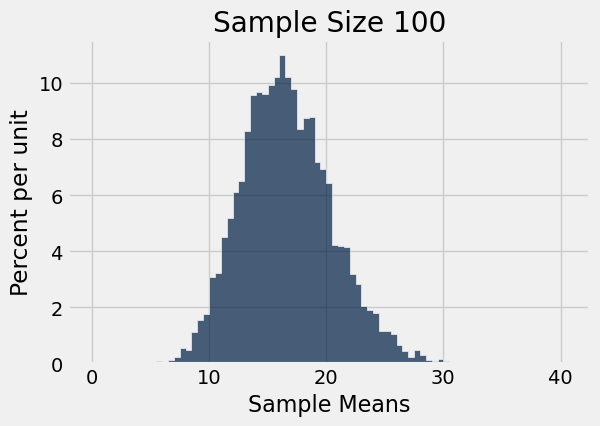

In [15]:
plot_sample_means(100)

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.65198525
Population SD: 39.4801998516
SD of sample means: 1.96839906349


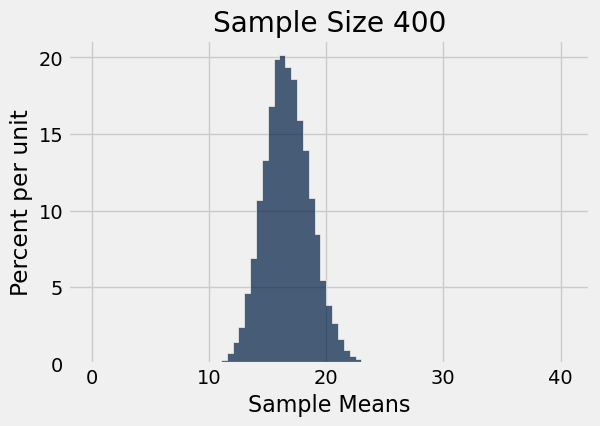

In [16]:
plot_sample_means(400)

Sample size:  900
Population mean: 16.6581555154
Average of sample means:  16.6489873333
Population SD: 39.4801998516
SD of sample means: 1.30942039527


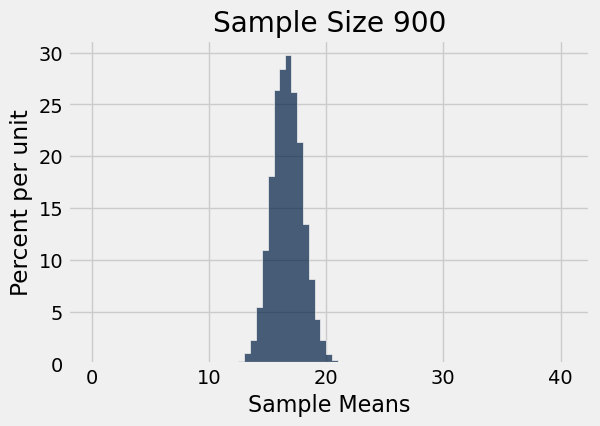

In [17]:
plot_sample_means(900)

## SD of the sample mean

For a bell-shaped and symmetric distribution of the sample means, we need to measure the average deviation of all sample means from the mean of all the sample means. This would appropriately be the Standard Deviation of all Simulated Sample Means(Sampling Error)

Can we find a formula for computing  the Standard Deviation of all Simulated Sample Means(Sampling Error)? Let us use data to go on an exploration below:

In [18]:
# Warning: this cell will take a long time to run (a few minutes)!
# Below is an image of the output for this section
# It may be best to run after class

sample_sizes = np.arange(100, 950, 50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [19]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table

Sample size,SD of simulated sample means,Pop SD / sqrt(sample size)
100,3.9386,3.94802
150,3.17923,3.22354
200,2.79596,2.79167
250,2.50944,2.49695
300,2.27726,2.27939
350,2.09321,2.11031
400,1.97976,1.97401
450,1.84565,1.86111
500,1.76065,1.76561
550,1.68158,1.68344


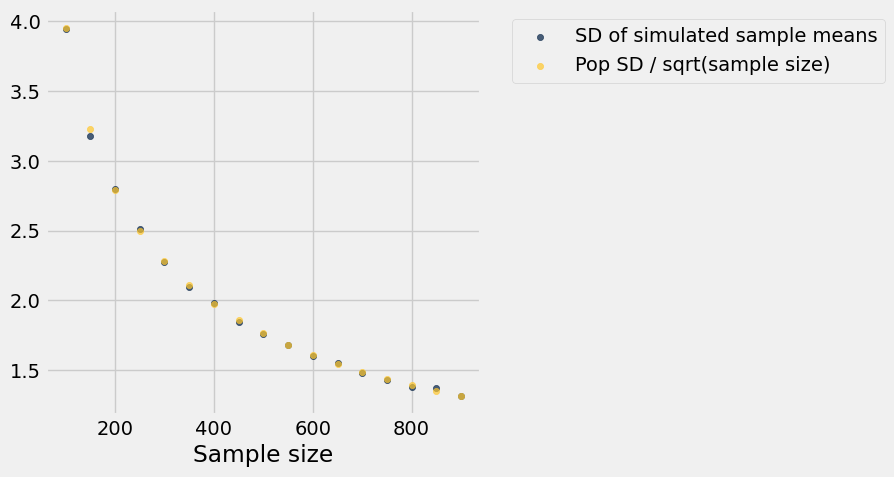

In [20]:
sd_table.scatter('Sample size')

A sample of the expected results above.

<img src="SD_of_sample_mean_output.png"/> 

Did you observe that:

$$
\text { SD of all possible sample means }=\frac{\text { Population SD }}{\sqrt{\text { sample size }}}
$$

## Choosing a Sample Size when Estimating a Confidence Interval ##

Candidate A is contesting an election. A polling organization wants to estimate the proportion of voters who will vote for her. Let’s suppose that they plan to take a simple random sample of voters, though in reality their method of sampling would be more complex.

The polling organization will make its estimate by constructing an approximate 95% confidence interval for the percent of voters who will vote for Candidate A.

The desired level of accuracy is that the width of the interval should be no more than 1%.

**How can they decide how large their sample should be, to get a desired level of accuracy?**



We are willing to tolerate a width of 1% = 0.01. So, using the formula developed in the last section,

$$
4 \times \frac{\text { SD of the } 0-1 \text { population }}{\sqrt{\text { sample size }}} \leq 0.01
$$

So
$$
\sqrt{\text { sample size }} \geq 4 \times \frac{\mathrm{SD} \text { of the } 0-1 \text { population }}{0.01}
$$


Let us go and find the SD of 0/1(NO/YES) Population

## SD of 0/1(NO/YES) Population  - Population Size ##

In [24]:
# Population of size 10

number_of_ones = 4
zero_one_population_10 = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
zero_one_population_10

array([ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [25]:
np.std(zero_one_population_10)

0.48989794855663565

In [37]:
# Population of size 100

number_of_ones = 40
zero_one_population_100 = np.append(np.ones(number_of_ones), np.zeros(100 - number_of_ones))
zero_one_population_100

np.std(zero_one_population_100)

0.21794494717703367

In [10]:
# Population of size 1000

number_of_ones = 400
zero_one_population_1000 = np.append(np.ones(number_of_ones), np.zeros(1000 - number_of_ones))
zero_one_population_1000

np.std(zero_one_population_1000)

0.48989794855663565

## SD of 0/1 Population  - Population Proportion ##

In [40]:
# Let's make a graph with proportion of ones on the x axis and SD on the y axis

In [41]:
def sd_of_zero_one_population_100(number_of_ones):
    """SD of a population with num_ones ones and (100 - num_ones) zeros"""
    zero_one_population_100 = np.append(np.ones(number_of_ones), np.zeros(100 - number_of_ones))
    return np.std(zero_one_population_100)

In [42]:
poss_ones = np.arange(101)
zero_one_pop = Table().with_columns(
    'Number of ones', poss_ones,
    'Proportion of ones', poss_ones / 100
)

zero_one_pop 

Number of ones,Proportion of ones
0,0
1,0.01
2,0.02
3,0.03
4,0.04
5,0.05
6,0.06
7,0.07
8,0.08
9,0.09


In [31]:
sds = zero_one_pop.apply(sd_of_zero_one_population_100, 'Number of ones')
zero_one_pop = zero_one_pop.with_column('SD', sds)

zero_one_pop

Number of ones,Proportion of ones,SD
0,0,0
1,0.01,0.0994987
2,0.02,0.14
3,0.03,0.170587
4,0.04,0.195959
5,0.05,0.217945
6,0.06,0.237487
7,0.07,0.255147
8,0.08,0.271293
9,0.09,0.286182


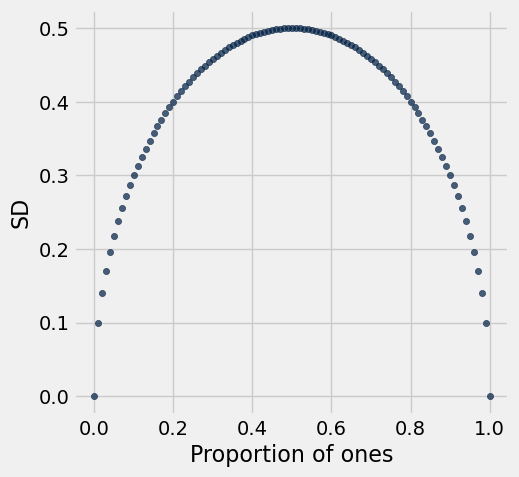

In [32]:
zero_one_pop.scatter('Proportion of ones', 'SD')

More importantly for our purposes, the SD increases as the proportion of 1’s increases, until the proportion of 1’s is 0.5; then it starts to decrease symmetrically.

Summary: The SD of a population of 1’s and 0’s is at most 0.5. That’s the value of the SD when 50% of the population is coded 1 and the other 50% are coded 0.

We know that
$$
\sqrt{\text { sample size }} \geq 4 \times \frac{\text { SD of the } 0-1 \text { population }}{0.01}
$$
and that the SD of the $0-1$ population is at most 0.5 , regardless of the proportion of 1 's in the population. So it is safe to take
$$
\sqrt{\text { sample size }} \geq 4 \times \frac{0.5}{0.01}=200
$$

So the sample size should be at least $200^2=40,000$. That's an enormous sample! But that's what you need if you want to guarantee great accuracy with high confidence no matter what the population looks like.